In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA
import sys
from sklearn.decomposition import PCA

In [28]:
df = pd.read_csv('811_aggregated_median_class.csv', low_memory=False)
index = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/mapping.csv', low_memory=False)

In [5]:
features = [f for f in df.columns if f.startswith('eff')]
meta_features = [feat for feat in df.columns if feat not in features]
top_moa = df.Metadata_moa.value_counts()[1:20].keys().tolist()

df.head()

,Unnamed: 0,Metadata_Aggregate_On,Metadata_Well_Position,Metadata_Plate,Metadata_Well,Metadata_broad_sample,Metadata_moa,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_Concentration,...,efficientnet_502,efficientnet_503,efficientnet_504,efficientnet_505,efficientnet_506,efficientnet_507,efficientnet_508,efficientnet_509,efficientnet_510,efficientnet_511
0,0,well,SQ00014812/A01,SQ00014812,A01,DMSO,unknown,0.0,0,NaN,...,3.432625e-09,9.803609e-10,2.195271e-06,5.841608e-11,1.983585e-12,2.306936e-06,2.402459e-09,1.847797e-11,5.252970e-08,1.128051e-06
1,1,well,SQ00014812/A02,SQ00014812,A02,DMSO,unknown,0.0,0,NaN,...,4.957783e-05,1.303421e-08,3.534693e-08,7.808864e-13,8.799593e-12,9.394263e-07,2.699113e-09,1.711644e-11,8.728982e-07,8.686126e-07
2,2,well,SQ00014812/A03,SQ00014812,A03,DMSO,unknown,0.0,0,NaN,...,1.410774e-05,1.057805e-08,9.230452e-08,7.083045e-13,7.152273e-12,1.084633e-06,1.679325e-08,3.021371e-11,1.808065e-06,6.445535e-07
3,3,well,SQ00014812/A04,SQ00014812,A04,DMSO,unknown,0.0,0,NaN,...,1.031905e-04,1.344526e-08,4.465145e-07,2.419374e-12,1.434216e-11,3.407125e-06,3.149164e-08,2.732146e-11,7.853214e-07,1.068879e-06
4,4,well,SQ00014812/A05,SQ00014812,A05,DMSO,unknown,0.0,0,NaN,...,1.051027e-05,1.175435e-07,3.282714e-07,1.077576e-10,1.782674e-11,4.033859e-05,4.209948e-08,5.837287e-11,1.012039e-07,2.840036e-05


(array([  1.,   1.,  27., 249., 135.,  71.,  12.,   6.,   6.,   4.]),
 array([0.00755929, 0.01173921, 0.01591912, 0.02009904, 0.02427895,
        0.02845887, 0.03263878, 0.0368187 , 0.04099861, 0.04517853,
        0.04935844]),
 <BarContainer object of 10 artists>)

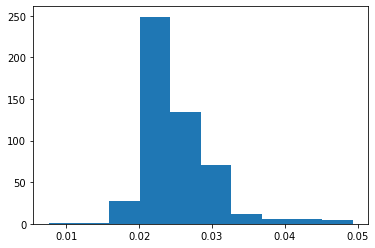

In [10]:
plt.style.use({'figure.facecolor':'white'})
plt.hist(df[features].std().tolist())

In [37]:
df['prediction'] = df[features].idxmax(axis = 1).str[13:].astype(int)

In [39]:
df = pd.merge(df, index, left_on=['Metadata_broad_sample'], right_on=['Class_Name'])

In [48]:
df[df['correct']].Target_x.value_counts()

511    19
390     5
397     5
395     5
105     5
       ..
423     2
422     2
418     2
417     2
93      2
Name: Target_x, Length: 512, dtype: int64

In [51]:
df[~df['correct']].Target_x.value_counts()

511    3232
396       2
340       2
277       2
346       2
       ... 
476       1
478       1
482       1
486       1
1         1
Name: Target_x, Length: 370, dtype: int64

In [49]:
df.head()


,Unnamed: 0_x,Metadata_Aggregate_On,Metadata_Well_Position,Metadata_Plate,Metadata_Well,Metadata_broad_sample,Metadata_moa,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_Concentration,...,efficientnet_510,efficientnet_511,Unnamed: 0_y,Target_x,Class_Name_x,prediction,Unnamed: 0,Target_y,Class_Name_y,correct
0,0,well,SQ00014812/A01,SQ00014812,A01,DMSO,unknown,0.0,0,NaN,...,5.252970e-08,1.128051e-06,131213,511,DMSO,471,131213,511,DMSO,False
1,1,well,SQ00014812/A02,SQ00014812,A02,DMSO,unknown,0.0,0,NaN,...,8.728982e-07,8.686126e-07,131213,511,DMSO,484,131213,511,DMSO,False
2,2,well,SQ00014812/A03,SQ00014812,A03,DMSO,unknown,0.0,0,NaN,...,1.808065e-06,6.445535e-07,131213,511,DMSO,484,131213,511,DMSO,False
3,3,well,SQ00014812/A04,SQ00014812,A04,DMSO,unknown,0.0,0,NaN,...,7.853214e-07,1.068879e-06,131213,511,DMSO,484,131213,511,DMSO,False
4,4,well,SQ00014812/A05,SQ00014812,A05,DMSO,unknown,0.0,0,NaN,...,1.012039e-07,2.840036e-05,131213,511,DMSO,118,131213,511,DMSO,False


In [50]:
df[df['correct']].Class_Name_x.value_counts()

DMSO                      19
BRD-K16803204-001-01-6     5
BRD-A68493689-001-01-9     5
BRD-K46386702-001-02-1     5
BRD-K19687926-379-07-4     5
                          ..
BRD-K79595931-312-01-3     2
BRD-A78723049-001-01-2     2
BRD-K78113049-001-16-2     2
BRD-K79759585-048-04-8     2
BRD-K78485176-001-07-8     2
Name: Class_Name_x, Length: 512, dtype: int64